In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import shapely.wkt
import shapely.ops
from shapely.geometry import Point
from shapely.wkt import loads 
from shapely.ops import substring
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio
import rasterio.plot 
from rasterio.warp import transform
from osgeo import gdal
from PIL import Image

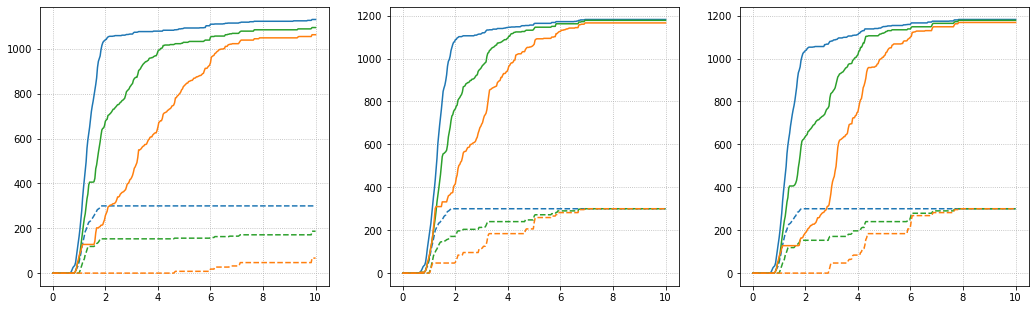

In [120]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(pad=3)

random_seed = 0
vphh = 2
visitor_cnts = 300
contra_id = 0
close_id = 0
close_mode = 'flame'
shelter_scen_id = '0'

comm_color = {1: 'C0', 2: 'C2', 3: 'C1'}

for fire_id in [1, 2, 3]:
    for comm_id in [1, 2, 3]:
        scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id)
        try:
            t_stats = pd.read_csv('t_stats/t_stats_{}.csv'.format(scen_nm))
        except FileNotFoundError:
            print('{} not found'.format(scen_nm))
            continue
            
        ax[fire_id-1].plot(t_stats['t']/3600, t_stats['local_arr'], c=comm_color[comm_id], label='local arrival, Communication scenario {}'.format(comm_id+1), alpha=1)
        ax[fire_id-1].plot(t_stats['t']/3600, t_stats['visitor_arr'], ls='--', c=comm_color[comm_id], alpha=1, label='visitor arrival, Communication scenario {}'.format(comm_id+1))

        if comm_id==1: ax[fire_id-1].grid(ls=':')



2 1 0 1.33 1.9 0 0 0 8 667 5.530209065935673 | 1.17 1.63 0 0 0 0 48 3.7906171028810354
2 1 0 1.43 6.93 0 143 0 8 598 4.488265693155125 | 1.23 1.83 0 57 0 0 26 2.5461440532921027


2 2 0 1.7 3.6 0 0 0 12 713 2.7245671728049783 | 1.6 5.03 0 0 0 0 58 2.369536144477912
2 2 0 1.9 6.93 0 143 0 12 676 1.8656308877271863 | 2.27 6.93 0 57 0 0 38 1.0811375057784933


2 3 0 2.57 5.0 0 0 0 24 779 1.1435813679613136 | 3.2 5.83 0 0 0 0 68 1.3928901084949386
2 3 0 3.13 6.93 0 147 0 24 694 1.0756482599930461 | 4.67 6.93 0 53 0 0 48 0.6593736263049451


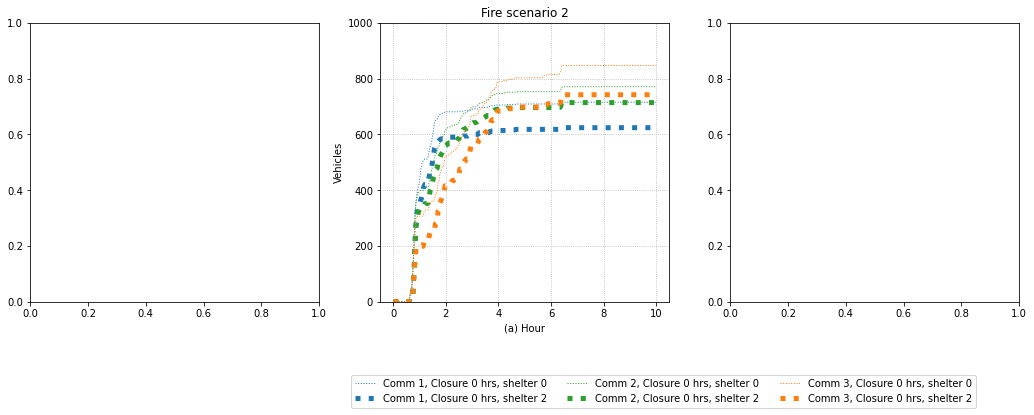

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(pad=3)

random_seed = 0
vphh = 2
visitor_cnts = 300
contra_id = 0
close_id = 0
close_mode = 'flame'
shelter_scen_id = '0'

comm_color = {1: 'C0', 2: 'C2', 3: 'C1'}
close_lw = {0: 1, 1: 3, 5: 5}
shelter_lw = {0: 1, 2: 5}
shelter_text = {0: 'No shelter', 2: '200 positions'}

for fire_id in [2]:
    for comm_id in [1, 2, 3]:
        print('\n')
#         for close_id in [0, 1, 5]:
        for shelter_scen_id in [0, 2]:
            scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id)
            try:
                t_stats = pd.read_csv('t_stats/t_stats_{}.csv'.format(scen_nm))
    #             t_stats = t_stats[t_stats['t']<4200]
#                 display(t_stats.tail())
            except FileNotFoundError:
                print('{} not found'.format(scen_nm))
                continue

            # analysis
            print(fire_id, comm_id, close_id,
                  np.round(t_stats.loc[np.argmin(np.abs(t_stats['local_arr']-595*vphh*0.5)), 't']/3600, 2),
                  np.round(t_stats.loc[np.argmin(np.abs(t_stats['local_arr']-595*vphh*0.9)), 't']/3600, 2),
                  np.max(t_stats['local_shelter_a1']),
                  np.max(t_stats['local_shelter_park']),
                  np.max(t_stats['local_shelter_p']),
                  np.min(t_stats['local_unloaded']),
                  t_stats['local_in_fire_cnts'].iloc[-1], 
                  (t_stats['local_in_fire_times'].iloc[-1])/(t_stats['local_in_fire_cnts'].iloc[-1]+0.0001)/60,
                  '|',
                  np.round(t_stats.loc[np.argmin(np.abs(t_stats['visitor_arr']-300*0.5)), 't']/3600, 2),
                  np.round(t_stats.loc[np.argmin(np.abs(t_stats['visitor_arr']-300*0.9)), 't']/3600, 2),
                  np.max(t_stats['visitor_shelter_a1']),
                  np.max(t_stats['visitor_shelter_park']),
                  np.max(t_stats['visitor_shelter_p']),
                  np.min(t_stats['visitor_unloaded']),
                  t_stats['visitor_in_fire_cnts'].iloc[-1], 
                  (t_stats['visitor_in_fire_times'].iloc[-1])/(t_stats['visitor_in_fire_cnts'].iloc[-1]+0.0001)/60
                 )

#             ax[fire_id-1].plot(t_stats['t']/3600, t_stats['local_arr'], c=comm_color[comm_id], lw=shelter_lw[shelter_scen_id], label='local arrival, Comm {}, {}'.format(comm_id, shelter_text[shelter_scen_id]), alpha=1)
#             ax[fire_id-1].plot(t_stats['t']/3600, t_stats['visitor_arr'], c=comm_color[comm_id], lw=shelter_lw[shelter_scen_id], ls=':', label='Visitor arrival, Comm {}, {}'.format(comm_id, shelter_text[shelter_scen_id]), alpha=1)
    #         ax[fire_id-1].plot(t_stats['t']/3600, t_stats['local_enroute']+t_stats['visitor_enroute'], ls='--', c=comm_color[comm_id], alpha=1, label='visitor arrival, Communication scenario {}'.format(comm_id+1))
#             ax[fire_id-1].plot(t_stats['t']/3600, (t_stats['local_in_fire_times']+t_stats['visitor_in_fire_times'])/(t_stats['local_in_fire_cnts']+t_stats['visitor_in_fire_cnts'])/60, ls=':', c=comm_color[comm_id], lw=shelter_lw[shelter_scen_id], alpha=1, label='Comm {}, Closure {} hrs, {}'.format(comm_id, close_id, shelter_text[shelter_scen_id]))
            ax[fire_id-1].plot(t_stats['t']/3600, (t_stats['local_in_fire_cnts']+t_stats['visitor_in_fire_cnts']), ls=':', c=comm_color[comm_id], lw=shelter_lw[shelter_scen_id], alpha=1, label='Comm {}, Closure {} hrs, shelter {}'.format(comm_id, close_id, shelter_scen_id))

        if comm_id==2:
            ax[fire_id-1].grid(ls=':')
            ax[fire_id-1].set_ylim([0, 1000])
            ax[fire_id-1].set_xlabel('({}) Hour'.format(chr(fire_id+95)))
#             ax[fire_id-1].set_ylabel('Average time in fire (minutes)')
            ax[fire_id-1].set_ylabel('Vehicles')
            ax[fire_id-1].set_title('Fire scenario {}'.format(fire_id))
#             ax[fire_id-1].legend(loc=[0.1, -0.25])
        if fire_id == 2:
            ax[fire_id-1].legend(loc=[-0.1, -0.38], ncol=3)

In [11]:
def plot_run_queue_fire(t, fire_id=None, comm_id=None, shelter_scen_id=None, scen_nm=None, roads_gdf=None, fire_raster=None, fire_raster_extent=None, link_stats_gdf=None):
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    ### road network
    roads = roads_gdf.plot(ax=ax, lw=0.5, color='gray', alpha=0.5)
    ### flames
    if (fire_raster is not None):
        cax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
        cmap = cm.get_cmap('Oranges', 5)
        cmap.set_under(color='white', alpha=100)
        flames = ax.imshow(fire_raster, extent=fire_raster_extent, cmap=cmap, vmin=0, vmax=5)
        fig.colorbar(flames, orientation='horizontal', cax=cax)
    ### queue plot
    queue_gdf = link_stats_gdf[link_stats_gdf['q']>0].copy()
    queue_gdf['geometry'] = queue_gdf.apply(lambda x: shapely.ops.substring( x['geometry'], 1-x['q']*8/(x['length']*x['lanes']), 1, normalized=True), axis=1)
    queue = queue_gdf.plot(ax=ax, lw=3, color='red')
    ### run plot
    run_gdf = link_stats_gdf[link_stats_gdf['r']>0].copy()
    run_gdf['geometry'] = run_gdf.apply(lambda x: shapely.ops.substring( x['geometry'], 0, x['r']*8/(x['length']*x['lanes']), normalized=True), axis=1)
    run = run_gdf.plot(ax=ax, lw=1, color='blue')
    (xlim_1, xlim_2) = ax.get_xlim()
    ax.set_xlim([xlim_1 + (xlim_2-xlim_1)*0.1, xlim_1 + (xlim_2-xlim_1)*0.8])
    (ylim_1, ylim_2) = ax.get_ylim()
    ax.set_ylim([ylim_1 + (ylim_2-ylim_1)*0.1, ylim_1 + (ylim_2-ylim_1)*0.6])
    shelter_text = {1: 'No sheltering', 2: 'Sheltering'}[shelter_scen_id]
    ax.text(0.6, 0.75, 'Fire location {}\nComm. scenario {}\n{}\n{:.1f} Hr'.format(fire_id, comm_id, shelter_text, t/3600), fontsize=22, transform=ax.transAxes)
    plt.savefig('../visualization_outputs/python_map/{}_t{}.png'.format(scen_nm, t))
    plt.close()

# base network
roads_df = pd.read_csv('../network_inputs/bolinas_edges_sim.csv')
roads_gdf = gpd.GeoDataFrame(roads_df, crs='epsg:4326', geometry=roads_df['geometry'].map(loads)).to_crs(26910)
    
random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id = 0, 2, 1, 2, 300, 0, 1, 'tree', 1
scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id)
print(scen_nm)

# fire
fire_raster_file = "../demand_inputs/flamelength/time_fire{}_match_road.tif".format(fire_id)
flame_raster_file = "../demand_inputs/flamelength/flame_fire{}_match_road.tif".format(fire_id)
# gdal.WarpOptions(dstSRS='EPSG:26910')
# kwargs = {"dstSRS": 'EPSG:26910', "format": "VRT"}
options = gdal.WarpOptions(dstSRS='EPSG:26910', format="VRT")
fire_raster_ds = gdal.Warp('', fire_raster_file, options=options)
flame_raster_ds = gdal.Warp('', flame_raster_file, options=options)
flame_raster_array0 = flame_raster_ds.GetRasterBand(1).ReadAsArray()
referenceTrans = fire_raster_ds.GetGeoTransform()
x_min, y_max, x_res, y_res = referenceTrans[0], referenceTrans[3], referenceTrans[1], -referenceTrans[5]  # make sure this value is positive
x_max = x_min + x_res*fire_raster_ds.RasterXSize
y_min = y_max - y_res*fire_raster_ds.RasterYSize
fire_raster_extent = (x_min, x_max, y_min, y_max)
fire_raster_array = fire_raster_ds.GetRasterBand(1).ReadAsArray()
# print(fire_raster_extent)
# print(flame_raster_array[flame_raster_array>0])

for t in range(1800, 7200, 360):
    # link stats
    link_stats_df = pd.read_csv('link_stats/link_stats_{}_t{}.csv'.format(scen_nm, t))
    link_stats_gdf = roads_gdf[['eid', 'length', 'lanes', 'geometry']].merge(link_stats_df, how='right', left_on='eid', right_on='link_id')
    # fire
    flame_raster_array = np.where((fire_raster_array>(t/3600-1)) & (fire_raster_array<=t/3600), flame_raster_array0, np.nan)
#     print(flame_raster_array[flame_raster_array>0])
#     print(t/3600-1, t/3600)
    # plot
    plot_run_queue_fire(t, scen_nm=scen_nm, fire_id=fire_id, comm_id=comm_id, shelter_scen_id=shelter_scen_id, roads_gdf=roads_gdf, fire_raster=flame_raster_array, fire_raster_extent=fire_raster_extent, link_stats_gdf=link_stats_gdf)

r0_fire2_comm1_vphh2_vistor300_contra0_close1mtree_shelter1


/home/bingyu/anaconda3/envs/py38/lib/python3.8/site-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/home/bingyu/anaconda3/envs/py38/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(500, 720, 3)
15 500 720 3


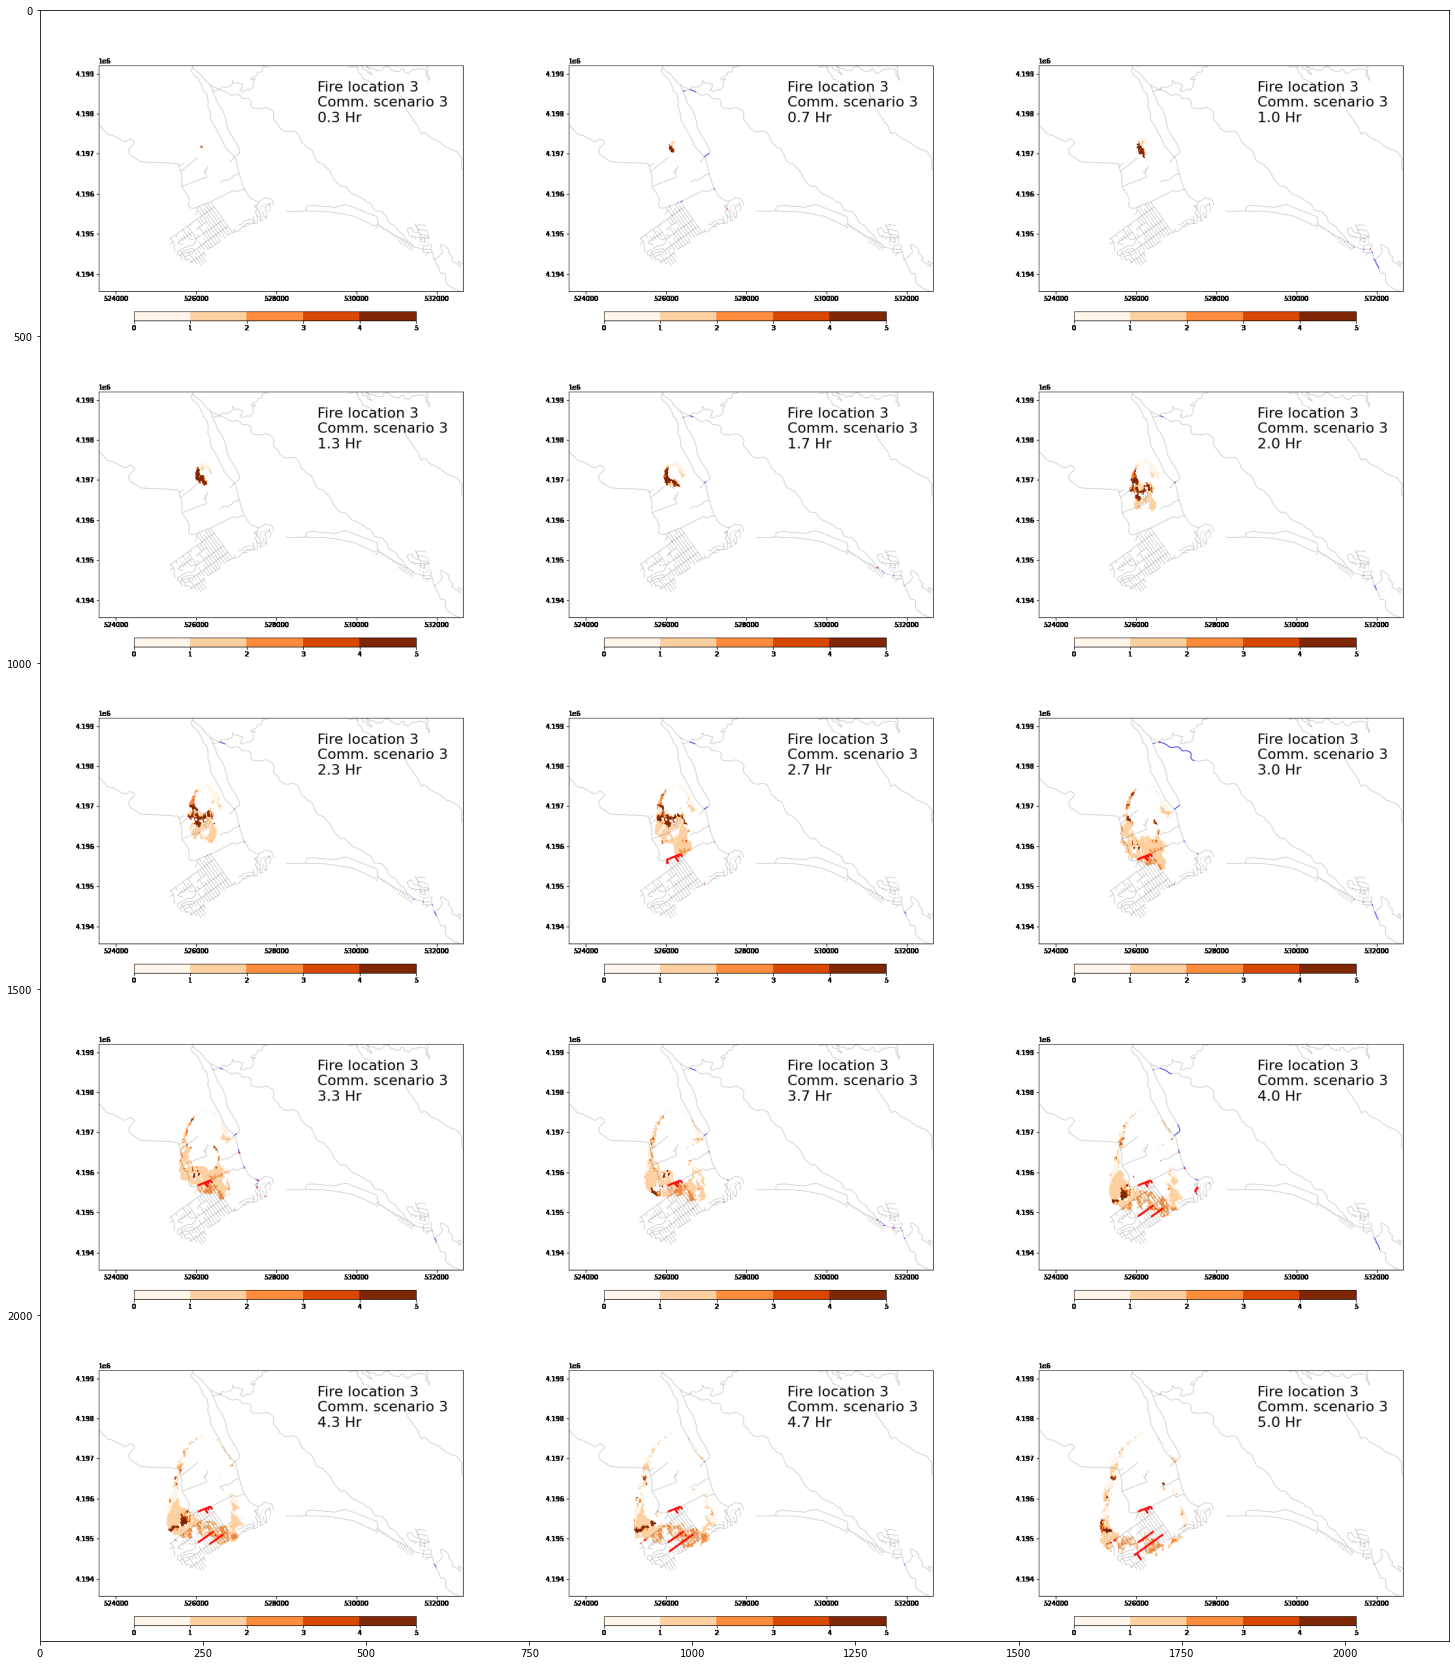

In [171]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    print(nindex, height, width, intensity)
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

def make_array():
    random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id = 0, 3, 3, 2, 300, 0, 5, 'flame', 0
    scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id)
    image_list = []
    for t in range(1200, 18001, 1200):
        image_list.append(np.asarray(Image.open('../visualization_outputs/python_map/{}_t{}.png'.format(scen_nm, t)).convert('RGB'))[100:600, :])
    print(image_list[0].shape)
    return np.array(image_list)

array = make_array()
result = gallery(array)
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(result)
plt.show()

(500, 720, 3)
8 500 720 3


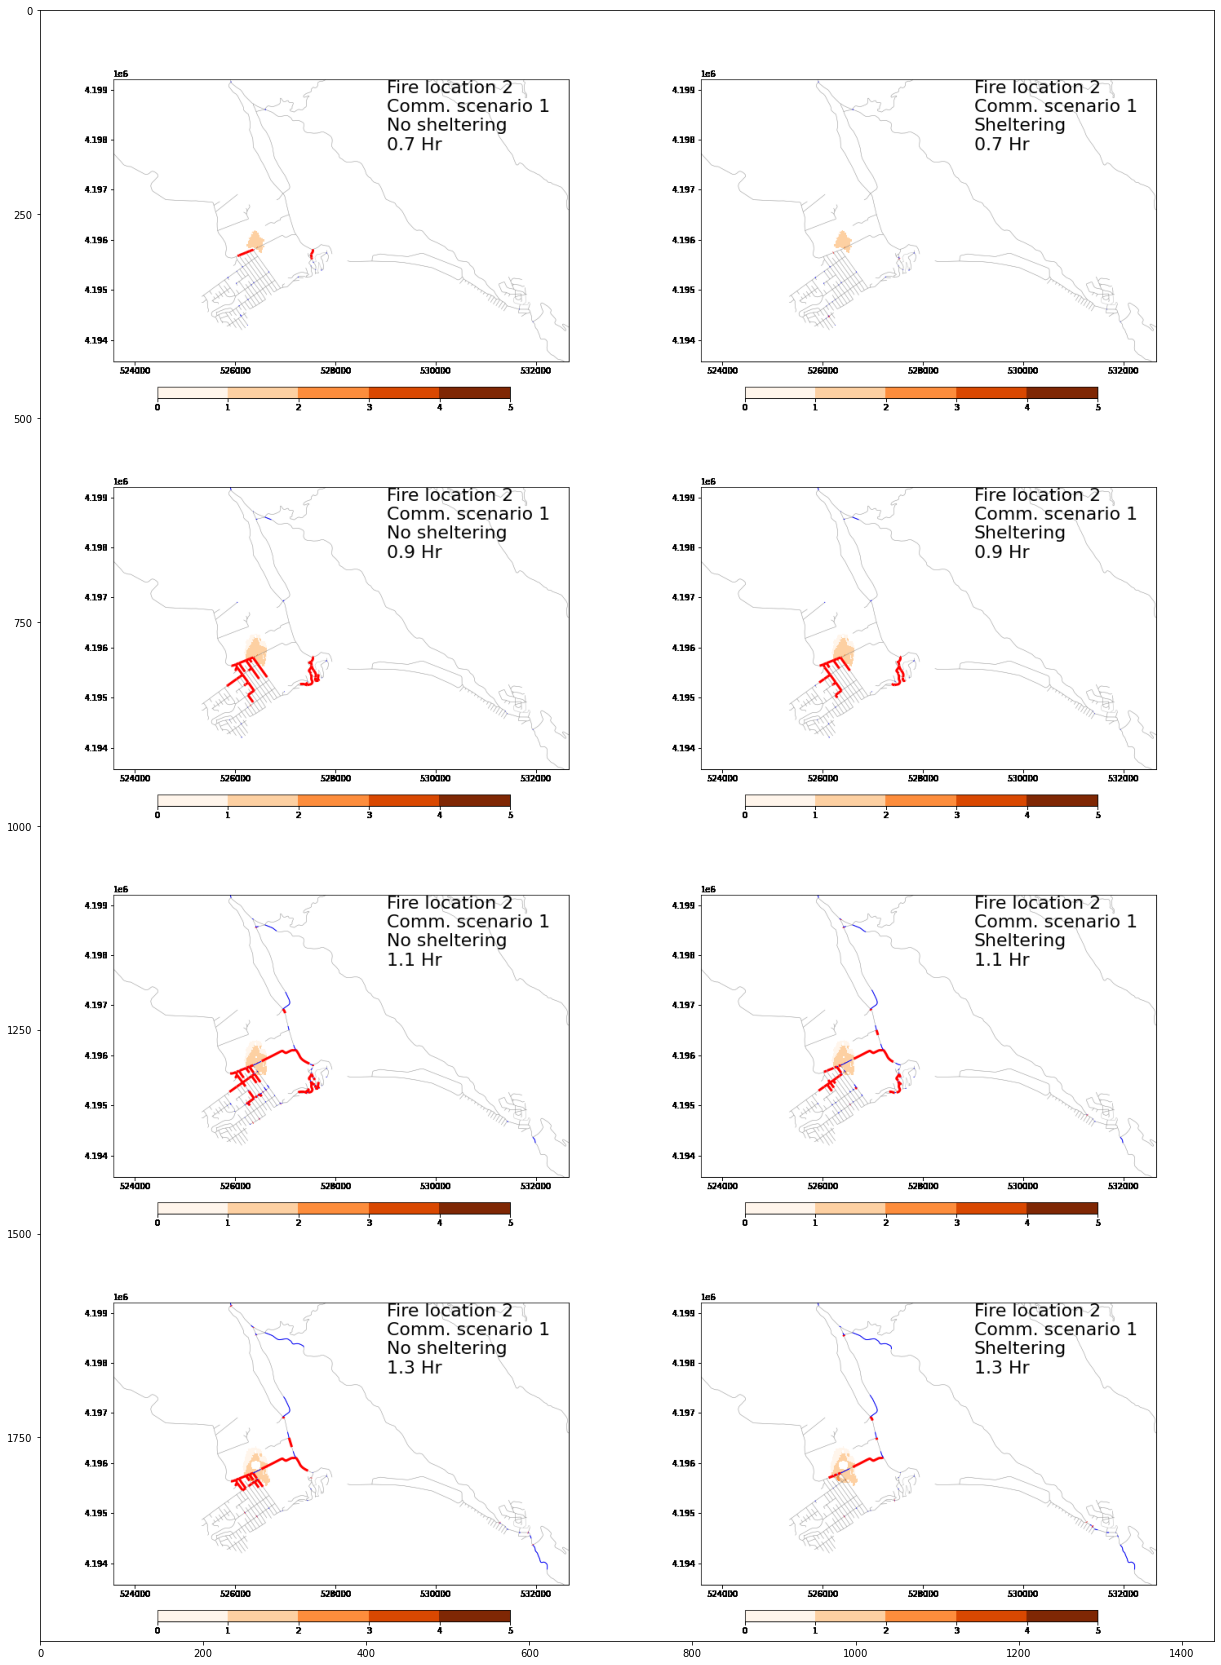

In [14]:
def gallery(array, ncols=2):
    nindex, height, width, intensity = array.shape
    print(nindex, height, width, intensity)
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

def make_array():
    random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode = 0, 2, 1, 2, 300, 0, 1, 'tree'
    image_list = []
    for t in range(2520, 5400, 720):
        for shelter_scen_id in [1, 2]:
            scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, close_id, close_mode, shelter_scen_id)
            image_list.append(np.asarray(Image.open('../visualization_outputs/python_map/{}_t{}.png'.format(scen_nm, t)).convert('RGB'))[100:600, :])
    print(image_list[0].shape)
    return np.array(image_list)

array = make_array()
result = gallery(array)
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(result)
plt.show()

In [181]:
def add_queue_length_geometry(row):
    if row['queue_proportion']==0:
        return None
    else:
        return substring(row['geometry'], 1-row['queue_proportion'], 1, normalized=True)
def add_run_length_geometry(row):
    if row['run_proportion']==0:
        return None
    else:
        return substring(row['geometry'], 0, row['run_proportion'], normalized=True)

def add_geom(rs=None, fire_id=None, comm_id=None, vphh=None, visitor_cnts=None, contra_id=None, close=None, close_mode=None, shelter_id=None, t=None):
    link_stats_t = pd.read_csv('link_stats/link_stats_r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}_t{}.csv'.format(rs, fire_id, comm_id, vphh, visitor_cnts, contra_id, close, close_mode, shelter_id, t))
    roads_df = pd.read_csv('network/modified_network_edges_r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}.csv'.format(rs, fire_id, comm_id, vphh, visitor_cnts, contra_id, close, close_mode, shelter_id))
    roads_gdf = gpd.GeoDataFrame(roads_df, crs='epsg:4326', geometry=roads_df['geometry'].map(loads)).to_crs(26910)
    link_stats_t = pd.merge(link_stats_t, roads_df[['eid', 'length', 'lanes', 'geometry']], how='left', left_on='link_id', right_on='eid')
    link_stats_t['queue_proportion'] = link_stats_t['q']*8/(link_stats_t['length']*link_stats_t['lanes'])
    link_stats_t['run_proportion'] = link_stats_t['r']*8/(link_stats_t['length']*link_stats_t['lanes'])
    link_stats_t['queue_length_geometry'] = link_stats_t.apply(add_queue_length_geometry, axis=1)
    link_stats_t['run_length_geometry'] = link_stats_t.apply(add_run_length_geometry, axis=1)
    link_stats_t.to_csv('../visualization_outputs/link_stats/link_stats_r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_close{}m{}_shelter{}_t{}.csv'.format(rs, fire_id, comm_id, vphh, visitor_cnts, contra_id, close, close_mode, shelter_id, t))

for t in range(36000, 36001):
    add_geom(rs=0, fire_id=2, comm_id=1, vphh=2, visitor_cnts=300, contra_id=0, close=5, close_mode='flame', shelter_id=0, t=t)

In [ ]:
import imageio

random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, wait, close = 0, 2, 1, 2, 300, 0, 10000, 2
scen_nm = "r{}_fire{}_comm{}_vphh{}_vistor{}_contra{}_wait{}_close{}".format(random_seed, fire_id, comm_id, vphh, visitor_cnts, contra_id, wait, close)

images = []
for t in range(0, 14400, 1200):
    images.append(imageio.imread('../visualization_outputs/python_map/{}_t{}.png'.format(scen_nm, t)))
imageio.mimsave('../visualization_outputs/python_map/{}.gif'.format(scen_nm), images, fps=2)

In [ ]:
rs, firescen, vphh, vist = 0, 2, 2, 300
for t in range(1200, 36000, 1200):
    fig, ax = plt.subplots(1,1, figsize=(10,20))
    for commscen in [2]:
        ### base
        roads_plot = roads_gdf.to_crs(26910).plot(ax=ax, lw=0.5, color='gray', alpha=0.5)

        ### flame
        flame_length = pd.read_csv(open('../demand_inputs/flamelength/flame_length_point_4326/point_firescen{}.csv'.format(firescen)))
        flame_length = gpd.GeoDataFrame(flame_length, crs='epsg:4326', geometry=[Point(xy) for xy in zip(flame_length.lon, flame_length.lat)])
        flame_plot = flame_length[(flame_length['t_hour']==(t//3600)) & (flame_length['flame_length']>2)].to_crs(26910).plot(ax=ax, lw=5, color='salmon', alpha=0.2)

        try:
            link_stats = pd.read_csv('link_stats/link_stats_rs{}_f{}_c{}_vphh{}_vist{}_nodetour_t{}.csv'.format(rs, firescen, commscen, vphh, vist, t))
        except FileNotFoundError:
            link_stats = pd.read_csv('link_stats/link_stats_rs{}_f{}_c{}_vphh{}_vist{}_noclosure_t{}.csv'.format(rs, firescen, commscen, vphh, vist, t))
        link_stats = pd.merge(roads_gdf[['edge_id_igraph', 'length', 'geometry']], link_stats, how='inner', right_on='link_id', left_on='edge_id_igraph')
        vehs_geom = link_stats[(link_stats['q']+link_stats['r'])>0].copy()
        vehs_geom['geometry'] = vehs_geom.to_crs(26910).apply(lambda x: shapely.ops.substring( x['geometry'], 1-(x['q']+x['r'])*8/x['length'], 1, normalized=True), axis=1)
        vehs_plot = vehs_geom.plot(ax=ax, lw=3, color='purple')

        ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
        ax.set_xlim([525000, 528500])
        ax.set_ylim([4194000, 4199230])
        if t>=3600: ax.set_title("{} hr {} min; comm. scen. {}".format(t//3600, (t%3600)//60, commscen + 1), fontsize=20)
        else: ax.set_title("{} min; comm. scen. {}".format(int(t/60), commscen + 1), fontsize=20)
    plt.savefig('../visualization_outputs/link_occupancy_images/comm2_rs{}_f{}_vphh{}_vist{}_t{}.png'.format(rs, firescen, vphh, vist, t), dpi=300)
    plt.close()